# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Image Geometric Transformation
### cv2.resize()

In [486]:
img = cv.imread("drawing.jpg")

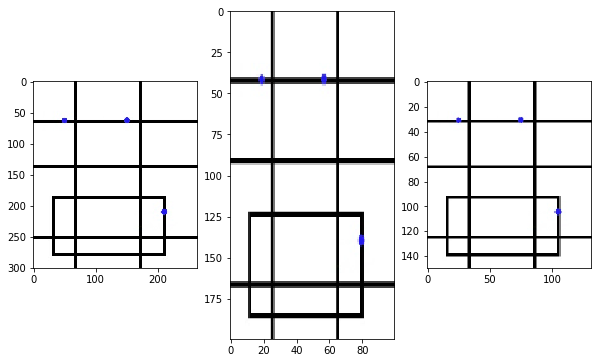

In [487]:
res = cv.resize(img, (100, 200))
res2 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(res)
axes[2].imshow(res2)

### cv2.flip()

In [216]:
print(cv.flip.__doc__)

flip(src, flipCode[, dst]) -> dst
.   @brief Flips a 2D array around vertical, horizontal, or both axes.
.   
.   The function cv::flip flips the array in one of three different ways (row
.   and column indices are 0-based):
.   \f[\texttt{dst} _{ij} =
.   \left\{
.   \begin{array}{l l}
.   \texttt{src} _{\texttt{src.rows}-i-1,j} & if\;  \texttt{flipCode} = 0 \\
.   \texttt{src} _{i, \texttt{src.cols} -j-1} & if\;  \texttt{flipCode} > 0 \\
.   \texttt{src} _{ \texttt{src.rows} -i-1, \texttt{src.cols} -j-1} & if\; \texttt{flipCode} < 0 \\
.   \end{array}
.   \right.\f]
.   The example scenarios of using the function are the following:
.   *   Vertical flipping of the image (flipCode == 0) to switch between
.       top-left and bottom-left image origin. This is a typical operation
.       in video processing on Microsoft Windows\* OS.
.   *   Horizontal flipping of the image with the subsequent horizontal
.       shift and absolute difference calculation to check for a
.       vertical-a

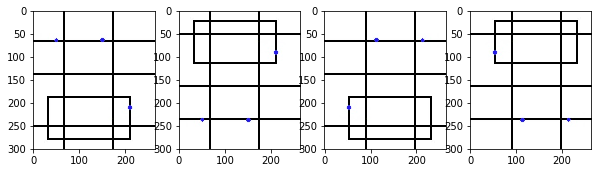

In [488]:
vertical_flip = cv.flip(img, 0)
horizontal_flip = cv.flip(img, 1)
hor_vert_flip = cv.flip(img, -1)


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(vertical_flip)
axes[2].imshow(horizontal_flip)
axes[3].imshow(hor_vert_flip)

### cv2.warpAffine() + cv2.getRotationMatrix2D() + cv2.getAffineTransform()

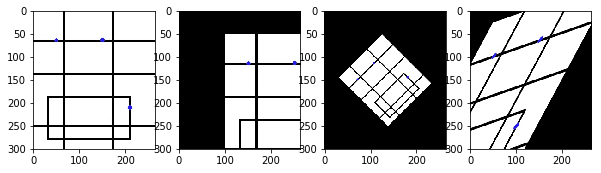

In [489]:
rows, cols = img.shape[:2]
# use numpy.float32()
# x->100, y->50
M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(img, M, (cols, rows))

# getRotationMatrix2D(center, angle, scale)
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 0.5)
dst2 = cv2.warpAffine(img, M, (cols, rows))

# 3 point before transformation
pts1 = np.float32([[50, 65], [150, 65], [210, 210]])
# 3 point after transformation
pts2 = np.float32([[50, 100], [150, 65], [100, 250]])
# build transform matrix
M = cv2.getAffineTransform(pts1, pts2)
dst3 = cv2.warpAffine(img, M, (cols, rows))

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(dst)
axes[2].imshow(dst2)
axes[3].imshow(dst3)

In [490]:
rows, cols = img.shape[:2]

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), -45, 2)
dst3 = cv2.warpAffine(dst2, M, (cols, rows))

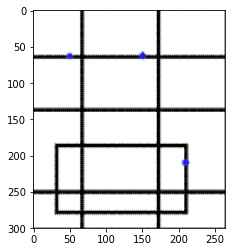

In [491]:
plt.imshow(dst3)

### Perspective Transformation : 2D->3D->2D

In [492]:
img = cv.imread("card.jpg")

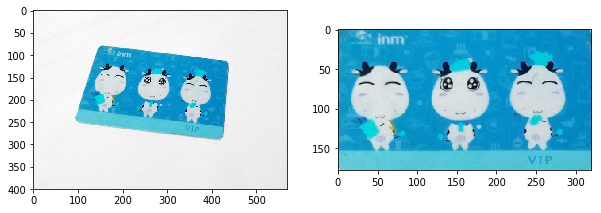

In [493]:
pts1 = np.float32([[148, 80], [437, 114], [94, 247], [423, 288]])
pts2 = np.float32([[0, 0], [320, 0], [0, 178], [320, 178]])
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (320, 178))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img)
axes[1].imshow(dst)